In [2]:
#import required libraries

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import joblib
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load CSV data
data = pd.read_csv('dataset.csv')  # Replace 'your_dataset.csv' with the actual file name

# Preprocessing dataset
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

data['processed_text'] = data['responses'].apply(preprocess_text)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['processed_text'], data['tag'], test_size=0.2, random_state=42
)

# Grid Search parameter to find the optimal value of C
param_grid = {
    'svm__C': [0.1, 1, 10, 100]
}

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(kernel='linear'))
])

# Use KFold with 5 splits
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=KFold(n_splits=5))
grid_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Add columns to DataFrame for predicted labels and correctness in the 20% testing dataset
test_data = pd.DataFrame({'processed_text': X_test, 'tag': y_test})
test_data['predicted_tag'] = y_pred
test_data['correct_prediction'] = test_data['predicted_tag'] == test_data['tag']

# Save the result DataFrame to CSV
test_data.to_csv('test_result.csv', index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
test_data.head()

,processed_text,tag,predicted_tag,correct_prediction
482,"Yes , teacher shall required use Schoolbook .",SCHOOLBOOK-REQUIREMENT,SCHOOLBOOK-REQUIREMENT,True
1505,Vehicles shall observe speed limit 20 kph with...,ObservanceOfSpeedLimit,ObservanceOfSpeedLimit,True
950,freshman DLSU-D required take eight ( 8 ) unit...,PHYSICAL-EDUCATION,PHYSICAL-EDUCATION,True
1005,Career service SWC DLSU-D focus career plannin...,CAREER_SERVICES_SWC,CAREER_SERVICES_SWC,True
705,One institutional self-care week scheduled wee...,SELF-CARE-WEEK,SELF-CARE-WEEK,True


In [4]:
test_data.tail()

,processed_text,tag,predicted_tag,correct_prediction
584,Faculty member may require student camera star...,CAMERA-REQUIREMENT,ENABLING-ASSESSMENTS,False
310,DLSU-D place high regard safety member communi...,SuspensionOfClasses,SuspensionOfClasses,True
56,HF stand Heraldo Filipino .,HF,HF,True
513,Teachers shall given beyond three teaching pre...,TEACHING-PREPARATIONS,TEACHING-PREPARATIONS,True
366,College Liberal Arts Communication DLSU-D offe...,CLAC-GraduatePrograms,CLAC-GraduatePrograms,True


In [5]:
test_data['correct_prediction'].value_counts()

True     324
False     24
Name: correct_prediction, dtype: int64

In [6]:
true_array = [True] * len(test_data)
accuracy_score(test_data['correct_prediction'], true_array)

0.9310344827586207

In [7]:
precision_score(test_data['correct_prediction'], true_array)

0.9310344827586207

In [8]:
recall_score(test_data['correct_prediction'], true_array)

1.0

In [9]:
f1_score(test_data['correct_prediction'], true_array)

0.9642857142857143

In [10]:
print(classification_report(test_data['correct_prediction'], true_array))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        24
        True       0.93      1.00      0.96       324

    accuracy                           0.93       348
   macro avg       0.47      0.50      0.48       348
weighted avg       0.87      0.93      0.90       348



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
confusion_matrix(test_data['tag'], test_data['predicted_tag'])


array([[2, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

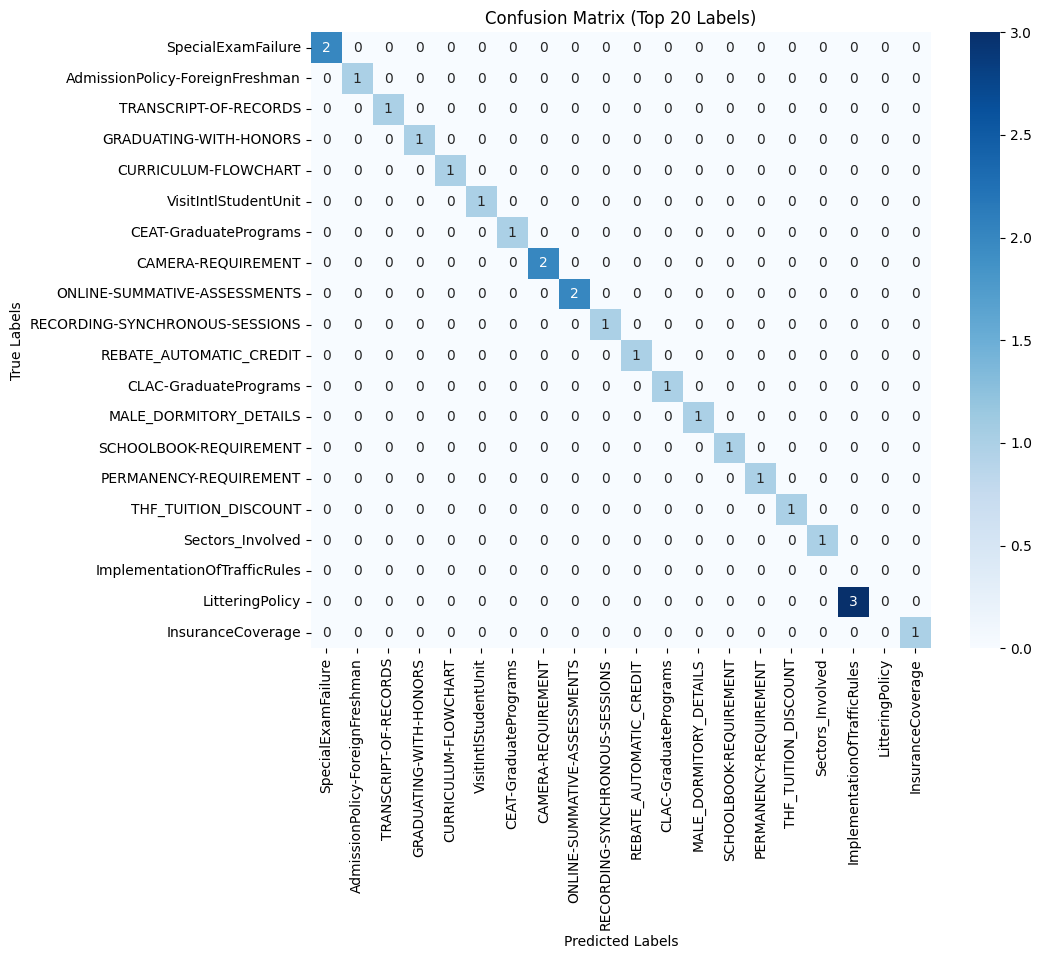

In [31]:
class_counts = test_data['tag'].value_counts()
top_classes = class_counts.head(20).index

# Find the indices corresponding to the top classes in the original order
top_class_indices = [i for i, label in enumerate(classes) if label in top_classes]

# Create a heatmap using only the top 20 labels
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix[top_class_indices][:, top_class_indices], annot=True, fmt="d", cmap="Blues",
            xticklabels=top_classes, yticklabels=top_classes)

# Customize the plot
plt.title("Confusion Matrix (Top 20 Labels)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

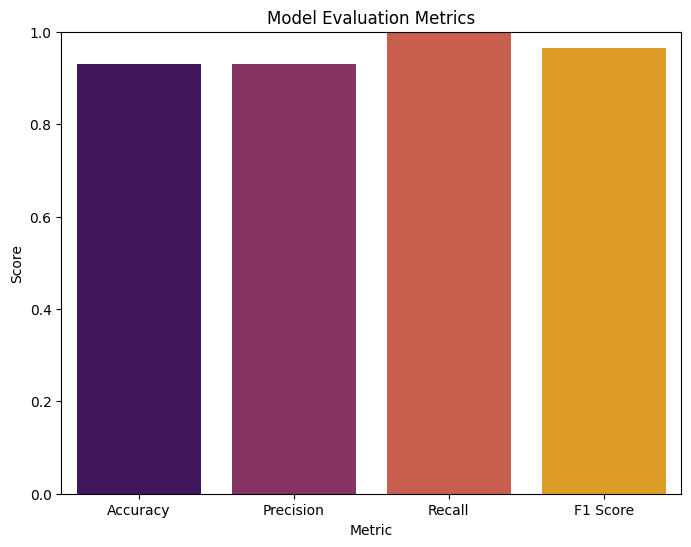

In [22]:
# Assuming you have the calculated scores
accuracy = accuracy_score(test_data['correct_prediction'], true_array)
precision = precision_score(test_data['correct_prediction'], true_array)
recall = recall_score(test_data['correct_prediction'], true_array)
f1 = f1_score(test_data['correct_prediction'], true_array)

# Create a DataFrame for visualization
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Convert the 'Score' column to numeric
metrics_df['Score'] = pd.to_numeric(metrics_df['Score'], errors='coerce')

# Plotting all metrics in a single figure
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='inferno')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  # Assuming scores are between 0 and 1
plt.show()

In [24]:
X_train.head()

561     Syllabus instructional material shall uploaded...
43      EBPSP stand Enhanced Brother President Scholar...
100                         PE stand Physical Education .
274     requesting unit responsible creation streamer ...
1265             Proselytizing considered minor offense .
Name: processed_text, dtype: object

In [25]:
#number of unique items in the train dataset in random format
y_train.unique()

array(['UPLOADING-INSTRUCTIONAL-MATERIALS', 'EBPSP', 'PE',
       'RequestingUnitResponsibility', 'ProselytizingAllowed',
       'FAILED-GRADE', 'POLCA', 'REHIRING-REQUIREMENT',
       'DefinitionOfTermsPeacefulAssembly',
       'STUDENT_REFERRAL_SPECIALIST_SWC', 'INTRO_COMPONENTS',
       'HabitualCommissionOfMinorOffenses', 'GATEWAY-ASSESSMENTS',
       'STUDENT_CLEARANCE_REQUIREMENT',
       'Misconduct_CloningUniversityWebsite', 'NonReadmissionPenalty',
       'SWC', 'ASYNCHRONOUS-ACTIVITIES', 'USG_OFFICERS_TUITION_DISCOUNT',
       'CSCS-UndergradPrograms', 'REFUND_POLICY', 'EquipmentUse',
       'ADDITIONAL-REFERENCES', 'ActsOfGrossDishonesty',
       'StudentComplaintAgainstParent', 'GRADING-SYSTEM-DECISION',
       'ActsOfLewdness', 'TRADITIONAL-BLENDED-SYNCHRONOUS',
       'SYLLABUS-FORMAT', 'StudentComplaintAgainstTrainer',
       'RECOMMENDATION_CERTIFICATION_USE', 'STUDENT_TRANSACTIONS',
       'ONLINE-SUMMATIVE-ASSESSMENTS',
       'GUIDANCE_COUNSELOR_FOLLOW_UP_SESSIONS',


In [26]:
#getting dataframe unique labels in ascending order
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

array(['ABSENCE-DUE-TO-MODULES', 'ACADEMIC_DEVELOPMENT_SWC',
       'ACADEMIC_SCHOLARSHIP_APPLICATION', 'ADDITIONAL-REFERENCES',
       'AEA-IRC_SERVICES', 'AEA-IRC_SUBSCRIPTIONS',
       'ALLOWED-ACTIVITIES-ONSITE', 'ASSESSMENT-STRATEGIES',
       'ASYNCHRONOUS-CLASSES', 'ATHLETES_TUITION_DISCOUNT',
       'Academic_Requirements_Details', 'ActivitiesAndExams',
       'ActivityMoneyMatters', 'ActivityNoncompliance',
       'ActivityTransportation', 'ActsOfGrossDishonesty',
       'ActsOfLewdness', 'AdmissionPolicy-ForeignFreshman',
       'AlmaMaterHymn', 'AlternativeSanction', 'AnnouncementProcedure',
       'AntiBullyingProvisions', 'AntiSexualHarassmentProvisions',
       'ApprovedAbsences', 'BLENDED-CLASSES-MODULES',
       'BOOKSTORE_INFORMATION', 'BasicRights',
       'BlessedArnoldJulesNicolasReche', 'BlessedScubillionRousseau',
       'BodyPiercing', 'CAMERA-REQUIREMENT', 'CAREER_SERVICES_SWC',
       'CBAA-GraduateStudies', 'CEAT', 'CEAT-GraduatePrograms',
       'CEAT-Undergr